Напишем скрипты для тестирования моделей на тестовой и валидационной выборке.

In [1]:
import shutil
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, precision_score, \
                            recall_score, roc_auc_score, ConfusionMatrixDisplay

In [2]:
FILE_NAME = 'dataset.zip'
FILE_PATH = os.getcwd()

Распакуем архив

In [3]:
if not os.path.exists(FILE_PATH + '/to_test'):
    shutil.unpack_archive(FILE_NAME, FILE_PATH)

Размер изображения

In [4]:
Pic_Y, Pic_X = 126, 224

Напишем функцию для оценки моделей с помощью матрицы неточностей и стандартных метрик.

In [5]:
def model_score(path_name, model_name):

    model = tf.keras.models.load_model(model_name, compile=False)

    model.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop",
                  metrics=['accuracy'])

    datagen = ImageDataGenerator(rescale = 1./255)
                            
    generator = datagen.flow_from_directory(path_name,
                                            target_size=(Pic_Y, Pic_X),
                                            batch_size=64,
                                            class_mode='categorical',
                                            shuffle=False)
    
    true_labels = generator.classes

    predictions = model.predict(generator)

    predicted_labels = np.argmax(predictions, axis=1)

    recall = recall_score(true_labels, predicted_labels, average='micro')
    precision = precision_score(true_labels, predicted_labels, average='micro')
    auc = roc_auc_score(true_labels, predictions, average='macro', 
                        multi_class='ovr')

    print('Test recall:', recall)
    print('Test precision:', precision)
    print('Test AUC:', auc)

    cm = confusion_matrix(true_labels, predicted_labels)

    class_names = list(generator.class_indices.keys())

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=class_names)

    _, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax, cmap=plt.cm.Blues)

    ax.set_title("Confusion matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    plt.show()

    return

In [6]:
path_name = 'to_test'

Модель convnet_from_scratch

Found 18690 images belonging to 9 classes.
293/293 [==============================] - 378s 1s/step
Test recall: 0.9300160513643659
Test precision: 0.9300160513643659
Test AUC: 0.9939373136529923


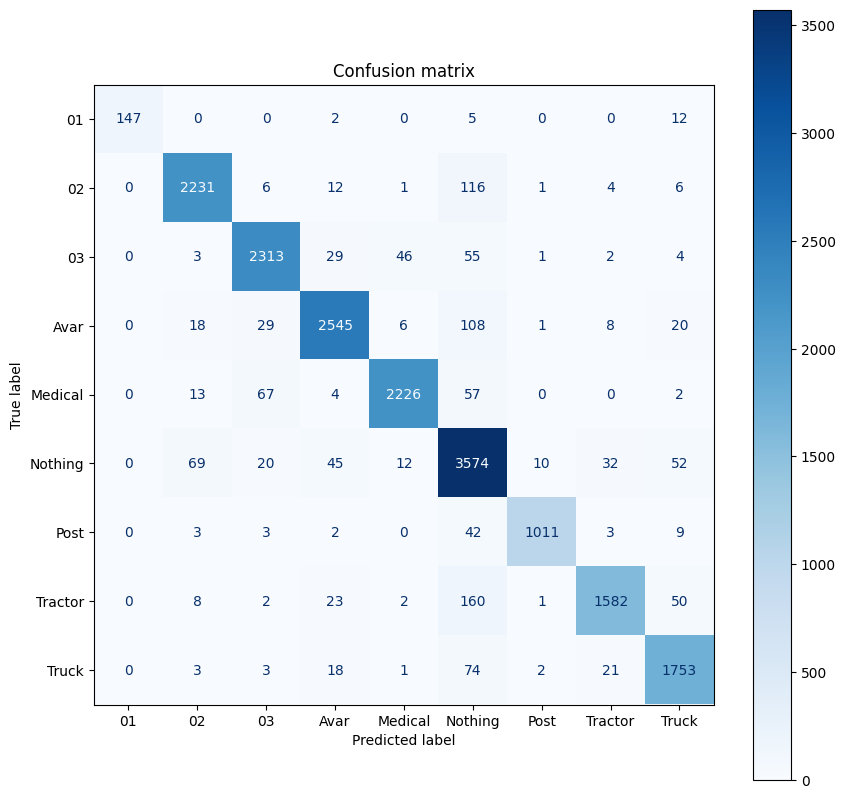

In [9]:
model_name = 'convnet_from_scratch.h5'
model_score(path_name, model_name)

Модель augmentation_model

Found 18690 images belonging to 9 classes.
293/293 [==============================] - 324s 1s/step
Test recall: 0.900374531835206
Test precision: 0.900374531835206
Test AUC: 0.990248736640127


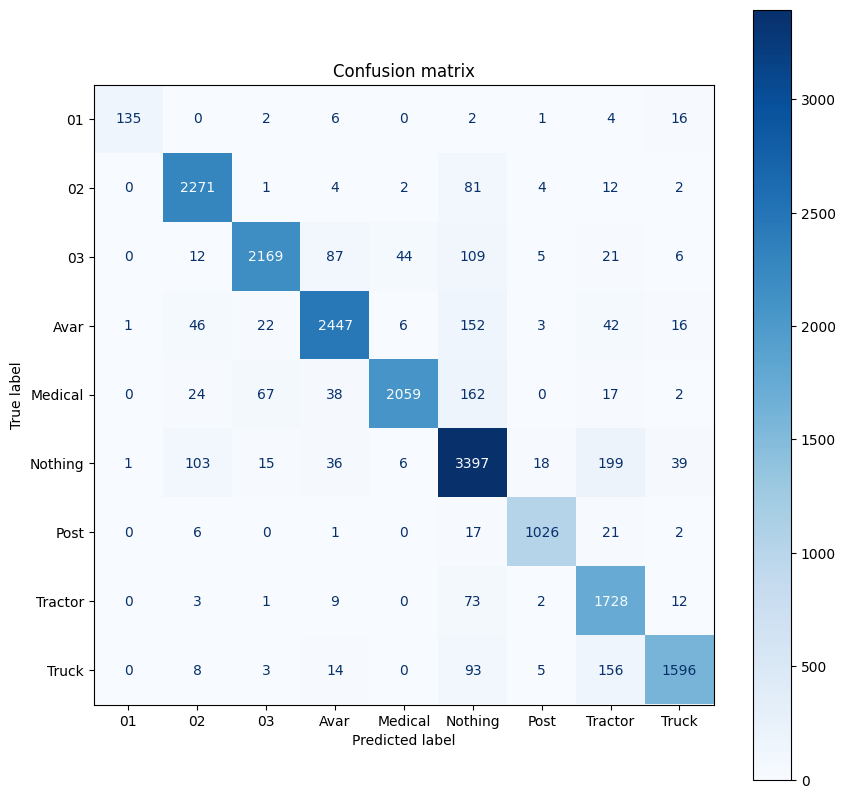

In [11]:
model_name = 'augmentation_model.h5'
model_score(path_name, model_name)

Модель convnet_with_dense

Found 18690 images belonging to 9 classes.
293/293 [==============================] - 383s 1s/step
Test recall: 0.9203317281968967
Test precision: 0.9203317281968967
Test AUC: 0.9948919787160507


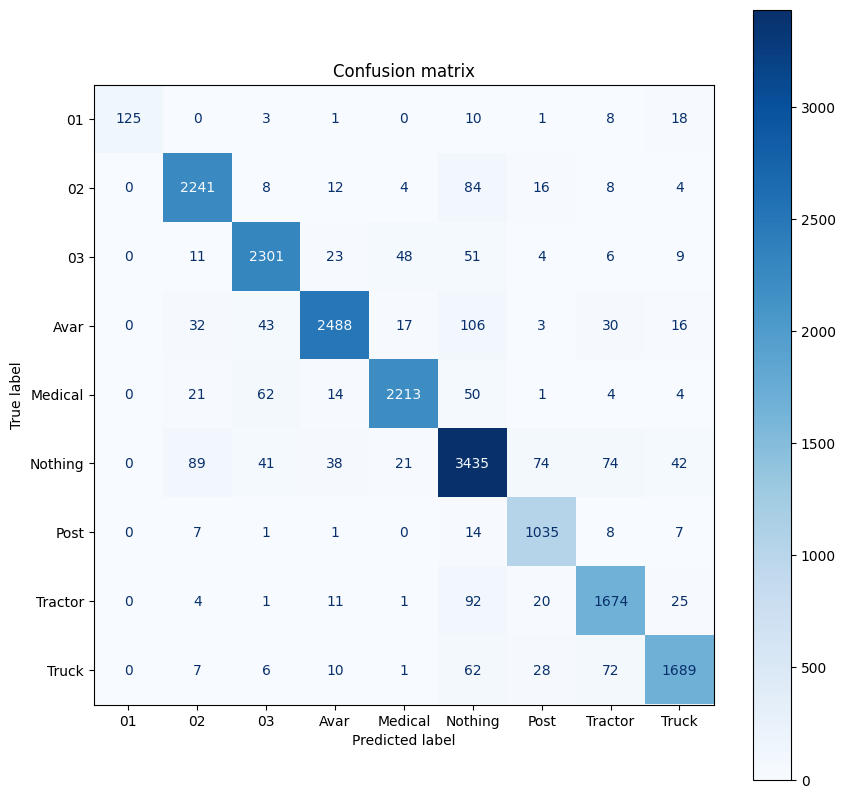

In [7]:
model_name = 'convnet_with_dense.h5'
model_score(path_name, model_name)

Found 18690 images belonging to 9 classes.
293/293 [==============================] - 404s 1s/step
Test recall: 0.9224719101123595
Test precision: 0.9224719101123595
Test AUC: 0.9953926060770044


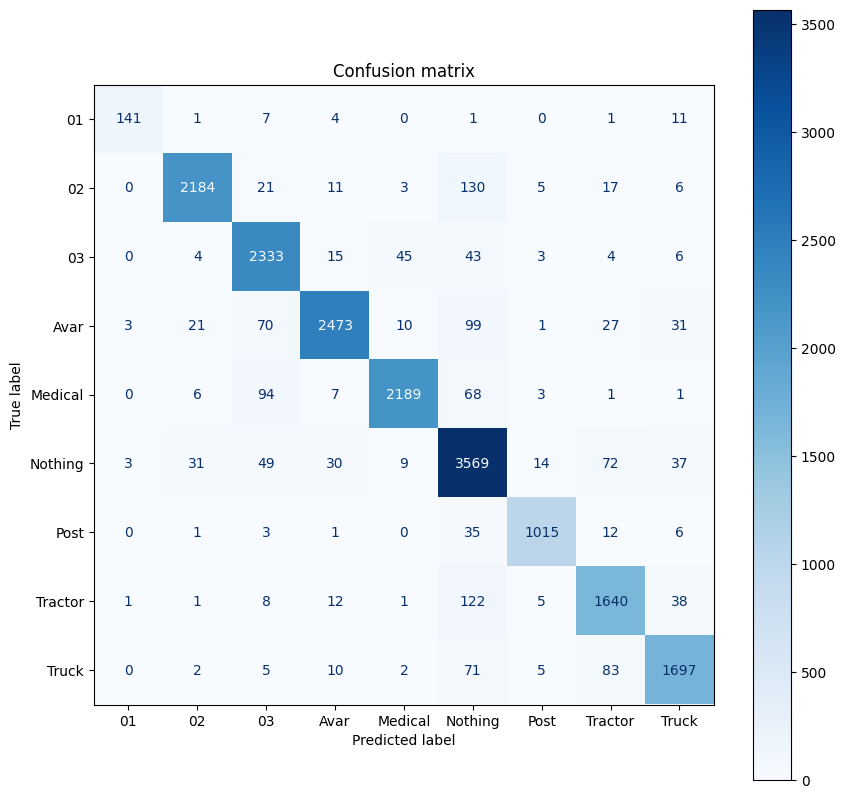

In [7]:
model_name = 'convnet_with_2_dense.h5'
model_score(path_name, model_name)

Found 18690 images belonging to 9 classes.
293/293 [==============================] - 528s 2s/step
Test recall: 0.9192616372391653
Test precision: 0.9192616372391653
Test AUC: 0.9955032495250138


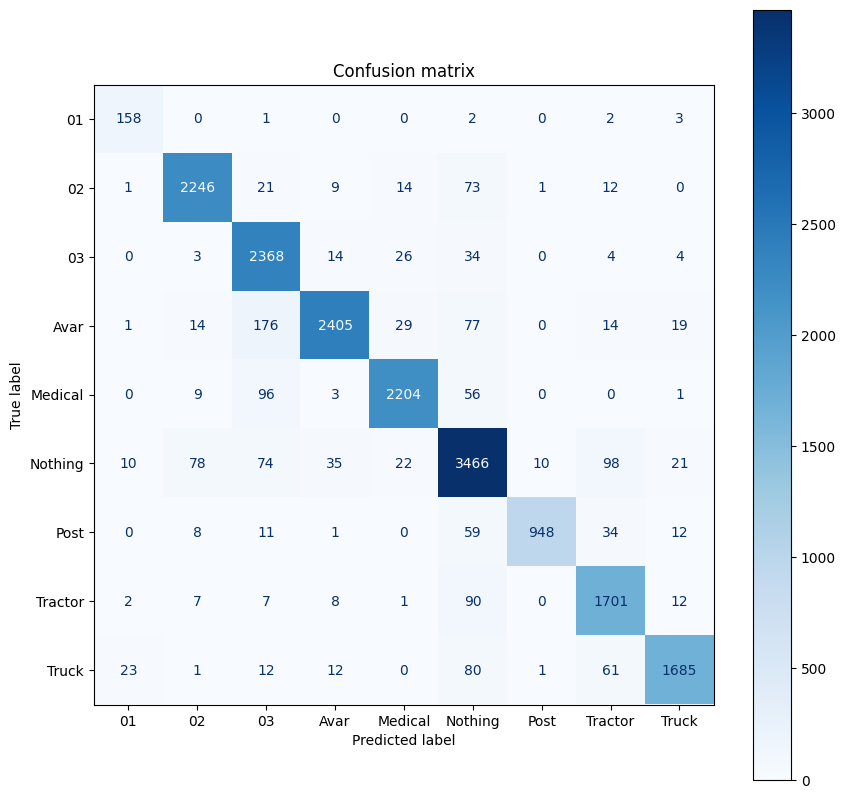

In [7]:
model_name = 'convnet_with_add_conv_and_2_dense.h5'
model_score(path_name, model_name)

Модель convnet_with_add_conv_and_2_dense показала наилучший ROC_AUC score. Проверим её на валидационной выборке.

Found 8562 images belonging to 9 classes.
134/134 [==============================] - 212s 2s/step
Test recall: 0.910184536323289
Test precision: 0.910184536323289
Test AUC: 0.9946541125608559


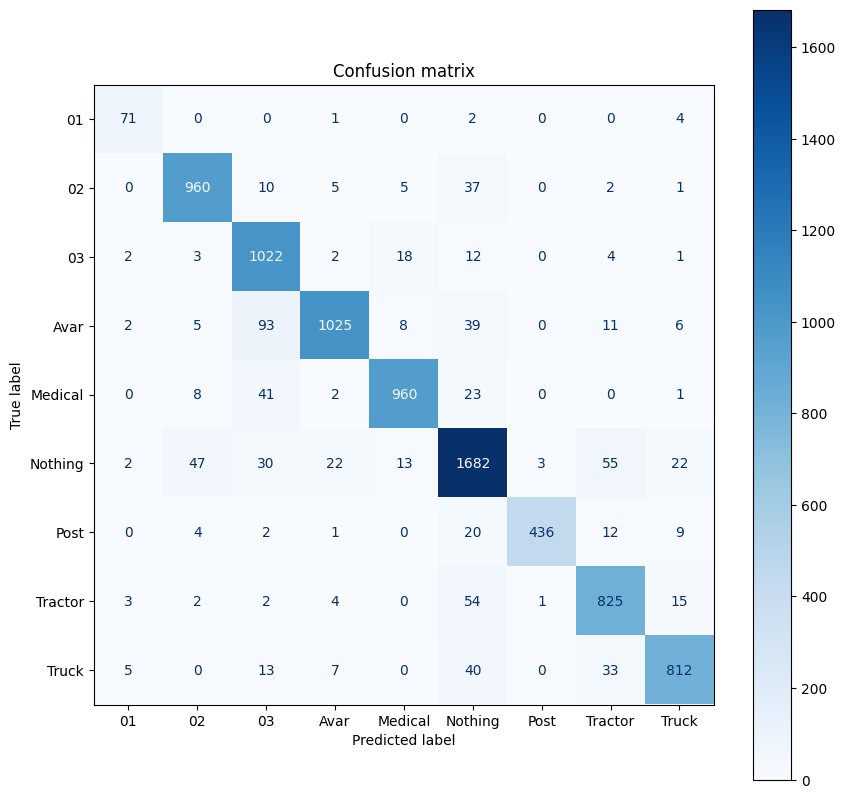

In [6]:
path_name = 'to_val'
model_name = 'convnet_with_add_conv_and_2_dense.h5'
model_score(path_name, model_name)

Финальный ROC_AUC составил 0.9946

In [12]:
# if os.path.exists(FILE_PATH + '/to_train'):
#     shutil.rmtree(FILE_PATH + '/to_train')

# if os.path.exists(FILE_PATH + '/to_test'):
#     shutil.rmtree(FILE_PATH + '/to_test')

# if os.path.exists(FILE_PATH + '/to_val'):
#     shutil.rmtree(FILE_PATH + '/to_val')